In [1]:
import numpy as np
import pandas as pd 

data = pd.read_csv('data.csv', header = -1)

In [2]:
data.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [3]:
X = np.array(data[[0,1]])
y = np.array(data[[2]])

In [4]:
W = np.array(np.random.rand(2,1))
W

array([[0.08246403],
       [0.65190358]])

In [33]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.

def perceptronStep(X, y, W, b, learn_rate = 0.01):
    
    for i in range(len(y)):
        yp = prediction(X[i], W, b)
        gap = y[i] - yp
        if gap == 1:
            W += learn_rate * X[i].reshape(2,1)
            b += learn_rate
        elif gap == - 1:
            W -= learn_rate * X[i].reshape(2,1)
            b -= learn_rate
        else:
            W = W
            b = b
    
    return W, b


# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.


def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines




In [41]:
out = trainPerceptronAlgorithm(X,y,learn_rate = 0.01, num_epochs = 25)

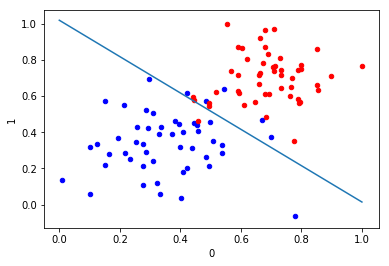

In [49]:
from matplotlib import pyplot as plt
xblue = data[data[2] == 1][[0,1]]
xred = data[data[2] == 0][[0,1]]
fig,ax = plt.subplots(1,1)
xblue.plot(ax=ax,x=0,y=1,kind='scatter',color='blue')
xred.plot(ax=ax,x=0,y=1,kind='scatter',color='red')

x_plot = np.linspace(0,1,100)
y_plot = out[-1][0]*x_plot + out[-1][1]

ax.plot(x_plot,y_plot)